## Import data

In [1]:
from pipeline.pipeline import Pipe

`subject_code` - any string for naming result files.

`path_to_eeg` - can be any type of eeg file that MNE's [read_raw](https://mne.tools/stable/generated/mne.io.read_raw.html) function supports.

`path_to_hypno` - visbrain's [point-per-second](http://visbrain.org/sleep.html#save-hypnogram) type of hypnogram

`output_directory` - a directory you want the results to be saved in

`sf_hypno` - hypnogram sampling frequency (visbrain's hypnograms default to 1)

In [2]:
pipe = Pipe(
    subject_code="HZ4",
    path_to_eeg=r"C:\Users\Gennadiy\Documents\HZ4\HZ4_SLEEP_20210629_132715.mff",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\HZ4\staging.txt",
    output_directory=r"C:\Users\Gennadiy\Documents\HZ4\processing",
    sf_hypno=1)

Reading EGI MFF Header from C:\Users\Gennadiy\Documents\HZ4\HZ4_SLEEP_20210629_132715.mff...
    Reading events ...
    Assembling measurement info ...


09-Jan-23 13:21:38 | WARNING | Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


#### Set channels types

In [3]:
EOG = {channel:'eog' for channel in ['E10', 'E46', 'E226', 'E252']}
EMG = {channel:'emg' for channel in ['E247', 'E237']}
RESP = {channel:'resp' for channel in ['Resp.Effort.Chest', 'Resp.Effort.Abd', 'Resp.Pressure']}
CHANNELS = EMG|EOG|RESP
pipe.mne_raw.set_channel_types(CHANNELS)

<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~358 kB, data not loaded>

## Preprocessing

### Resampling

`sfreq` - desired sampling frequency

`save` - if true, saves resampled eeg data and metadata in .fif files.

In [6]:
pipe.resample(
    sfreq=250,
    save=True 
    )

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\pipeline\pipeline.py:105: RuntimeWarning: module cupy not found, CUDA not enabled
  self.mne_raw.resample(sfreq, n_jobs=n_jobs, verbose='WARNING')
09-Jan-23 11:01:53 | WARNING | Hypnogram is LONGER than data by 0.03 seconds. Cropping hypnogram to match data.size.


Writing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\AH8_250hz_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\AH8_250hz_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\AH8_250hz_raw-1.fif
Closing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\AH8_250hz_raw.fif
[done]


### Filtering

#### High pass

In [10]:
pipe.plot()

Channels marked as bad:
none


`savefig` - save filter info plot. [FIR filters](https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html#fir-filters).

Reading 0 ... 8919090  =      0.000 ...  8919.090 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 11001 samples (11.001 sec)

Now using CUDA device 0
Enabling CUDA with 10.99 GB available memory
Using CUDA for FFT FIR filtering
Setting up band-pass filter from 0.3 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-12 dB cutoff frequen

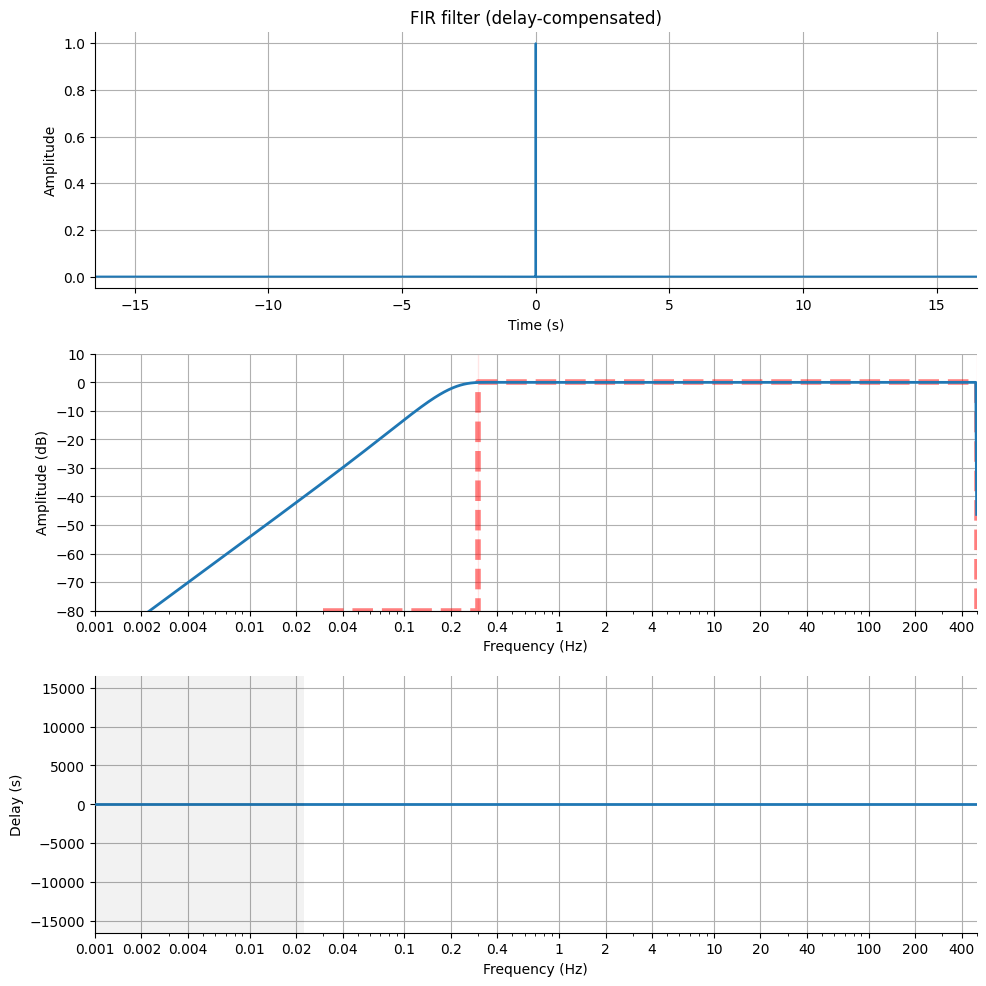

In [4]:
pipe.filter(
    l_freq=0.3, 
    savefig=True)

#### Notch

In [5]:
pipe.notch()

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Using CUDA for FFT FIR filtering


In [6]:
pipe.plot()

Using qt as 2D backend.
Channels marked as bad:
none


In [5]:
pipe._save_raw('after_highpass_and_notch_raw.fif')

Writing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\after_highpass_and_notch_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\after_highpass_and_notch_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\after_highpass_and_notch_raw-1.fif
Closing C:\Users\Gennadiy\Documents\AH8\processing\saved_raw\after_highpass_and_notch_raw.fif
[done]


#### Manual

Create average reference projection

In [6]:
pipe.mne_raw.set_eeg_reference(projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawMff | signal1.bin, 264 x 9456971 (9457.0 s), ~18.60 GB, data loaded>

Mark bad channels

`save_bad_channels` - if true, saves bad channels to *bad_channels.txt* file.

In [11]:
pipe.plot(butterfly=True)

Channels marked as bad:
['E200', 'E210', 'E229', 'E249', 'E232', 'E230']


In [14]:
pipe.plot(
    save_bad_channels=True
)

Using qt as 2D backend.
Channels marked as bad:
none


If you want to continue with previously saved bad channels, use `pipe.read_bad_channels()`. The function will import the channels from *bad_channels.txt* file in the output directory.

In [11]:
pipe.read_bad_channels()

#### Interpolate bad channels

Set reference as the overall average before interpolating

In [12]:
pipe.mne_raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~17.54 GB, data loaded>

Interpolate bad channels by [spherical spline interpolation](https://mne.tools/stable/overview/implementation.html#bad-channel-repair-via-interpolation)

`reset_bads` - bad channels are saved in a txt file, so we can reset it in our current metadata

In [13]:
pipe.mne_raw.interpolate_bads(reset_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 236 sensor positions
Interpolating 15 sensors


<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~17.54 GB, data loaded>

Reapply overall average reference after interpolation

In [5]:
pipe.mne_raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


<RawMff | signal1.bin, 264 x 8919091 (8919.1 s), ~17.54 GB, data loaded>

In [14]:
pipe.plot()

Channels marked as bad:
none


In [10]:
pipe._save_raw('interpolated_raw.fif')

Writing C:\Users\Gennadiy\Documents\HZ4\saved_raw\interpolated_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\HZ4\saved_raw\interpolated_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\HZ4\saved_raw\interpolated_raw-1.fif
Closing C:\Users\Gennadiy\Documents\HZ4\saved_raw\interpolated_raw.fif
[done]


#### ICA

In [4]:
import os
import mne
from mne.preprocessing import (ICA, corrmap, create_ecg_epochs,
                               create_eog_epochs)

In [5]:
pipe.mne_raw.load_data()

Reading 0 ... 2364242  =      0.000 ...  9456.968 secs...


<Raw | after_highpass_and_notch_raw.fif, 264 x 2364243 (9457.0 s), ~4.65 GB, data loaded>

In [21]:
eog_evoked = create_eog_epochs(pipe.mne_raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
#eog_evoked.plot_joint()

Using EOG channels: E10, E46, E226, E252
EOG channel index for this subject is: [  9  45 225 251]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 1 significant peak
Number of EOG events detected: 1
Not setting metadata
1 matching events found
No baseline correction applied
Using data from preloaded Raw for 1 events and 251 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Gennadiy\Documents\eeg-processing-pipeline\.venv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Gennadiy\AppData\Local\Temp\2\ipykernel_11452\3367094015.py:1: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  eog_evoked = create_eog_epochs(pipe.mne_raw).average()


<Evoked | '998' (average, N=0), -0.5 – 0.5 sec, baseline -0.5 – -0.2 sec, 251 ch, ~828 kB>

In [6]:
filt_raw = pipe.mne_raw.copy().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 251 out of 251 | elapsed:   10.4s finished


In [7]:
ica = ICA(n_components=15, max_iter='auto', random_state=97)
ica.fit(filt_raw)

Fitting ICA to data using 251 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 99.7s.


Method,fastica
Fit,68 iterations on raw data (2364243 samples)
ICA components,15
Available PCA components,251
Channel types,eeg
ICA components marked for exclusion,—


In [8]:
ica.plot_sources(pipe.mne_raw, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=20, n_times=2364243
    Range : 0 ... 2364242 =      0.000 ...  9456.968 secs
Ready.
Using qt as 2D backend.


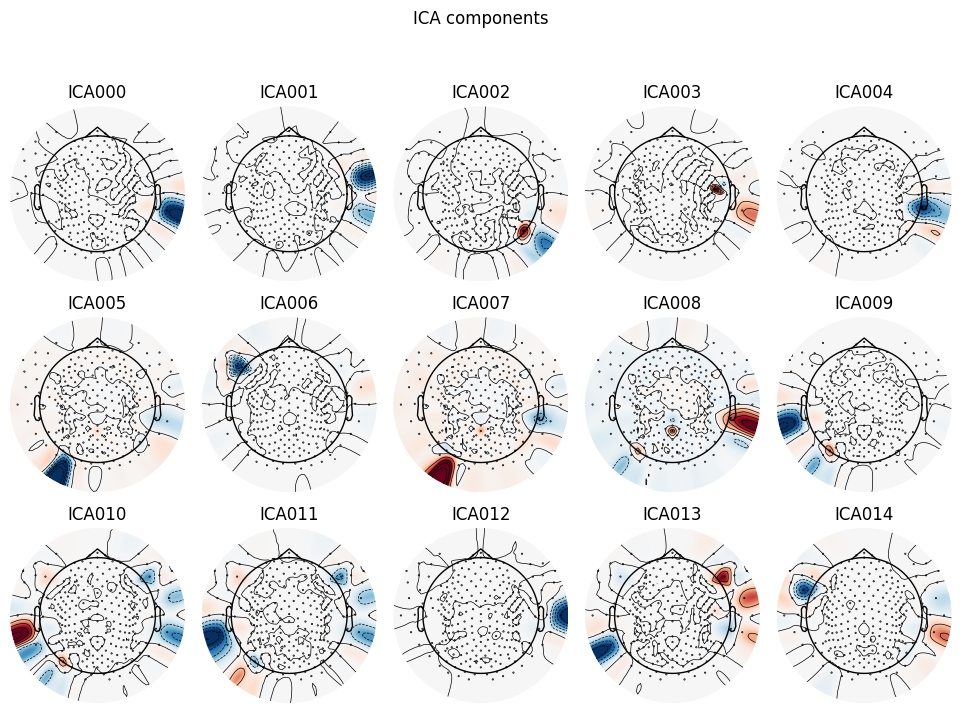

[<MNEFigure size 975x731.5 with 15 Axes>]

In [9]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 251 PCA components


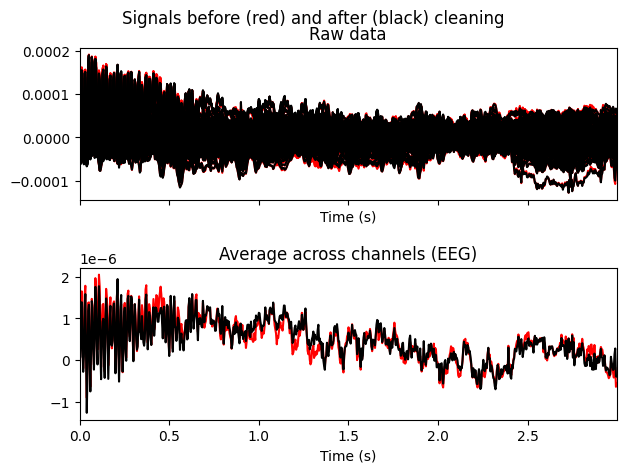

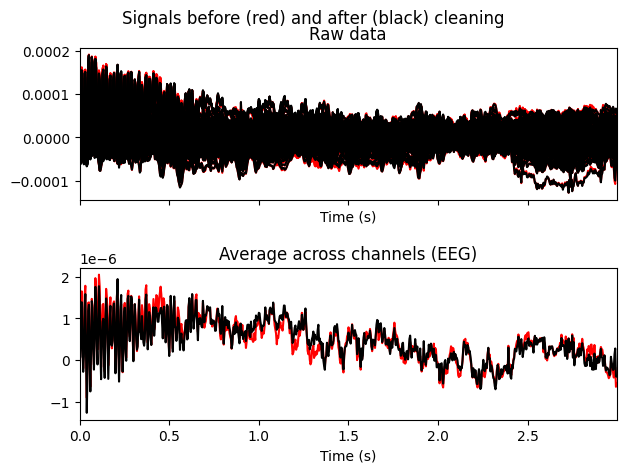

In [15]:
ica.plot_overlay(pipe.mne_raw, exclude=[6], picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
4064 matching events found
No baseline correction applied
0 projection items activated


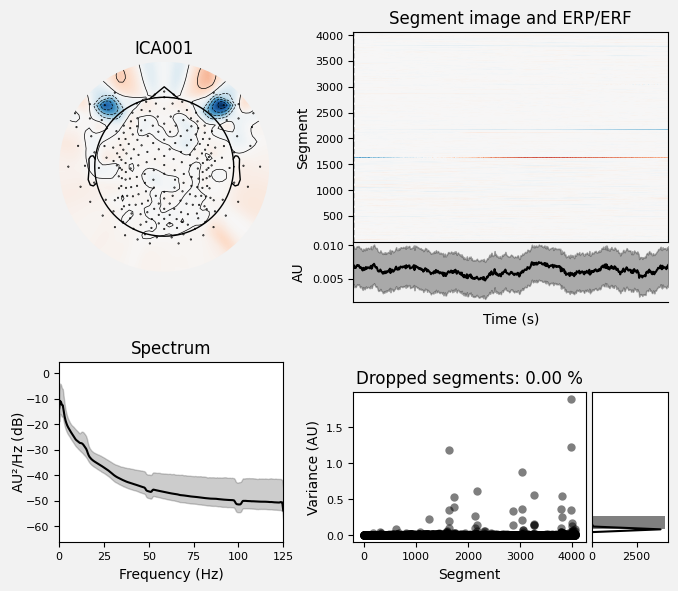

[<Figure size 700x600 with 6 Axes>]

In [16]:
ica.plot_properties(pipe.mne_raw, picks=[1])

## Results

### Hypnospectrogram

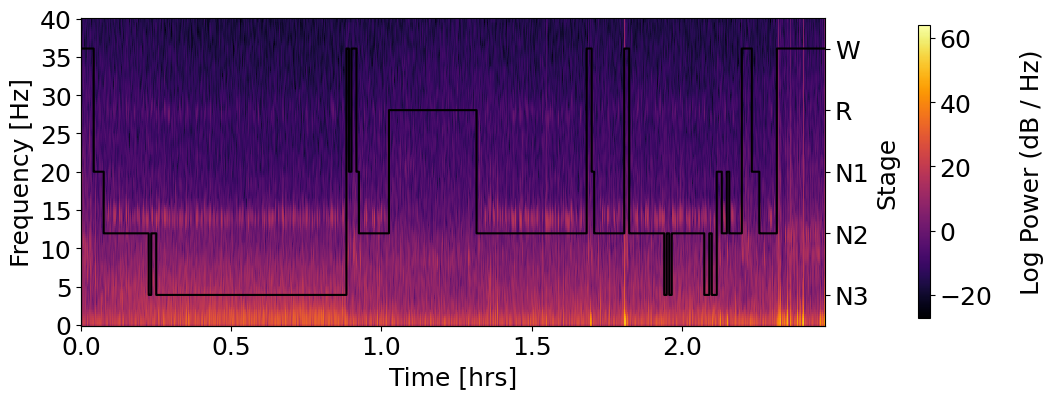

In [11]:
pipe.plot_hypnospectrogram(
    picks=['E101'],
    win_sec=4,
    freq_range=(0, 40),
    cmap='inferno',
    overlap=True,
    save=True)

### Power Spectral Density

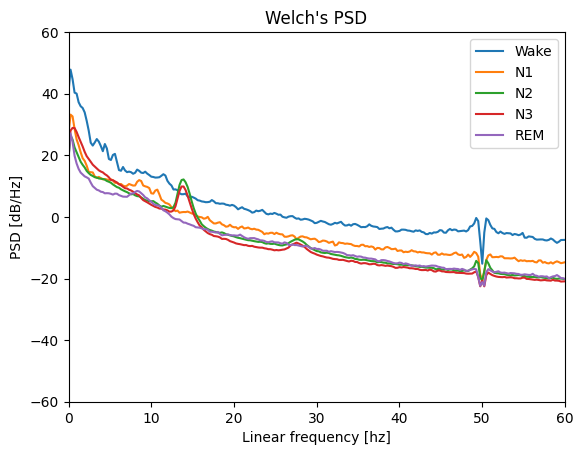

In [12]:
pipe.plot_psd_per_stage(
    picks=['E101'], 
    sec_per_seg=4.096,
    psd_range=(-60, 60),
    freq_range=(0, 60),
    xscale='linear',
    sleep_stages={'Wake' :0, 'N1' :1, 'N2': 2, 'N3': 3, 'REM': 4},
    save=True)

### Sleep Stats

In [16]:
pipe.sleep_stats(save_to_csv=True)

#### Import hypnogram as mne annotation

In [1]:

from itertools import groupby
import numpy as np
seqs = [(key, len(list(val))) for key, val in groupby(pipe.hypno)]
new_seqs = [(stage, int(end)) for stage, end in zip([seq[0] for seq in seqs], np.cumsum([seq[1] for seq in seqs]))]
stages = {0:'Wake', 1:'N1', 2:'N2', 3:'N3', 4:'REM'}
onset = [0]+[end for stage, end in new_seqs][:-1]
duration = [end for stage, end in seqs]
description = [stages[stage] for stage, end in seqs]
import mne
annot = mne.Annotations(onset=onset,
                           duration=duration,
                           description=description)

pipe.mne_raw.set_annotations(annot)
pipe.plot(
)

NameError: name 'pipe' is not defined